<a href="https://colab.research.google.com/github/GouravMidya/DSW-MLtest/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# *Introduction*

# Data Collection and Preprocessing

In [3]:
train_data_path = "/content/drive/MyDrive/DSW Assessment/train_data.xlsx"
train_data = pd.read_excel(train_data_path)

In [18]:
train_data.head()

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status,income_to_loan_ratio
0,10608026,2014-01-01,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,Individual,253.99,Verified,4648,11,0,9.722222
1,10235120,2014-01-01,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,Individual,233.52,Source Verified,14051,11,1,10.833333
2,10705805,2014-01-01,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,Individual,287.50,Verified,14885,11,0,9.125000
3,11044991,2014-01-01,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,Individual,336.22,Source Verified,7542,2,1,11.800000
4,10161054,2014-01-01,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,Individual,237.80,Verified,6318,11,0,6.300000


In [20]:
train_data.sample(5)

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status,income_to_loan_ratio
18055,18955058,2014-06-01,C2,36 months,RENT,665,0,75000.0,13.35,debt_consolidation,5000,Individual,169.32,Not Verified,11602,3,1,15.00000
105107,72624667,2016-02-01,D4,36 months,OWN,695,0,35000.0,18.99,debt_consolidation,5600,Individual,205.25,Not Verified,16518,3,0,6.25000
24655,20359155,2014-07-01,D3,36 months,RENT,690,0,40456.0,16.99,debt_consolidation,2600,Individual,92.69,Not Verified,2609,11,1,15.56000
63877,48222853,2015-05-01,C1,36 months,RENT,675,0,25000.0,12.29,home_improvement,8400,Individual,280.17,Verified,5299,5,1,2.97619
105163,70813854,2016-02-01,D2,60 months,RENT,685,0,240000.0,17.27,debt_consolidation,20000,Individual,499.96,Source Verified,31590,1,0,12.00000


# Exploratory Data Analysis (EDA)


In [4]:
# Display basic information
print("Basic Information:")
print(train_data.info())
print("\nSummary Statistics:")
print(train_data.describe())
print("\nMissing Values:")
print(train_data.isnull().sum())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       


<ipython-input-5-e733dc359f5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=train_data, palette='viridis')


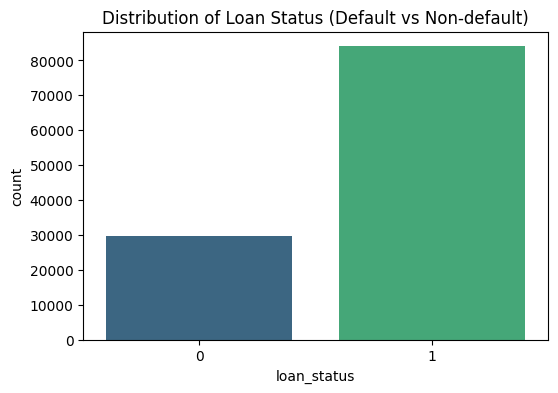

In [5]:
# Check target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=train_data, palette='viridis')
plt.title('Distribution of Loan Status (Default vs Non-default)')
plt.show()

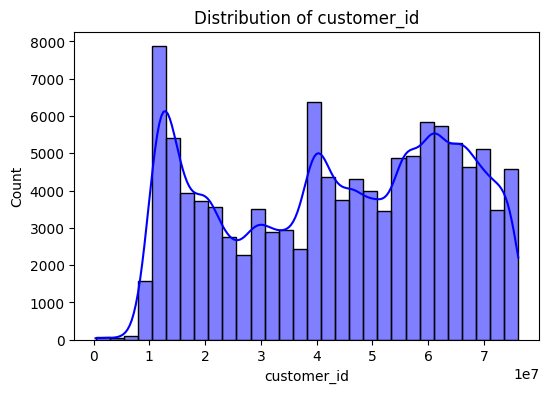

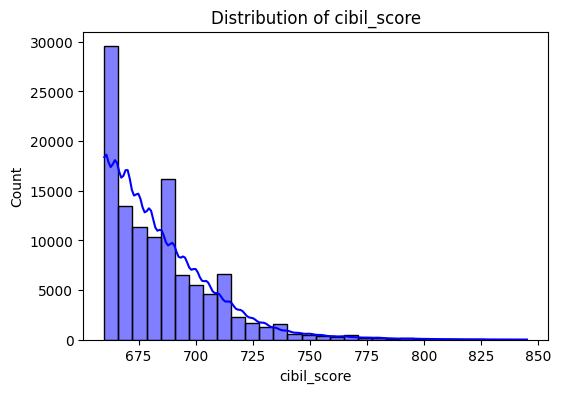

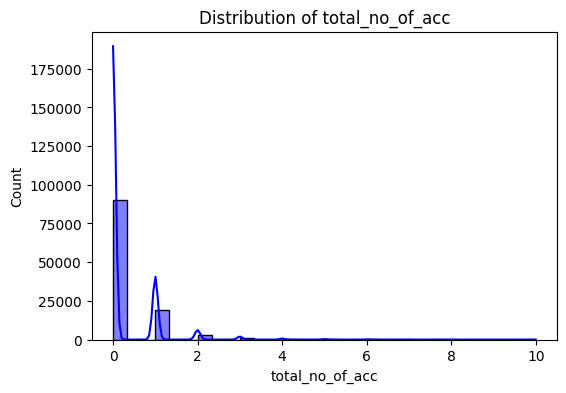

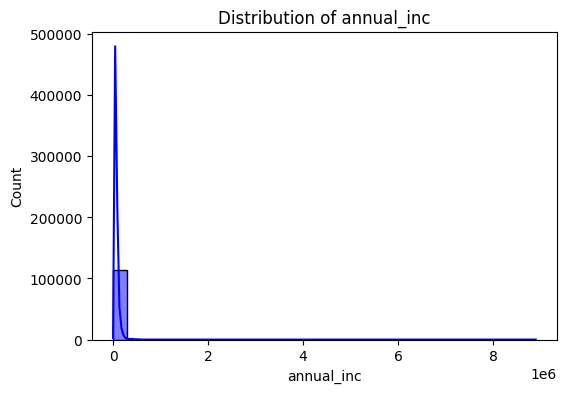

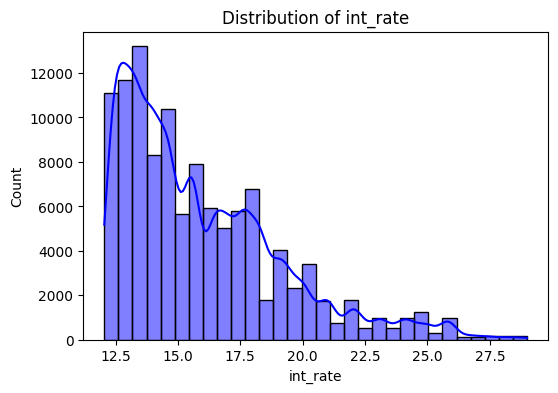

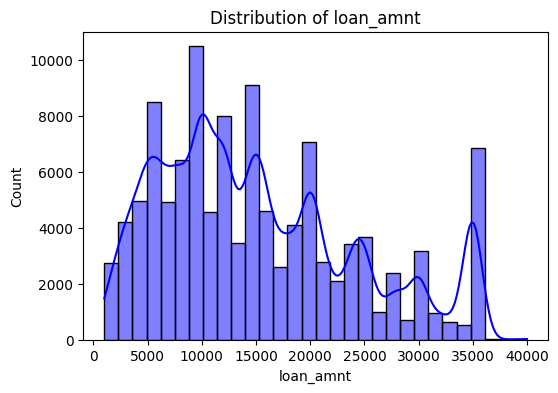

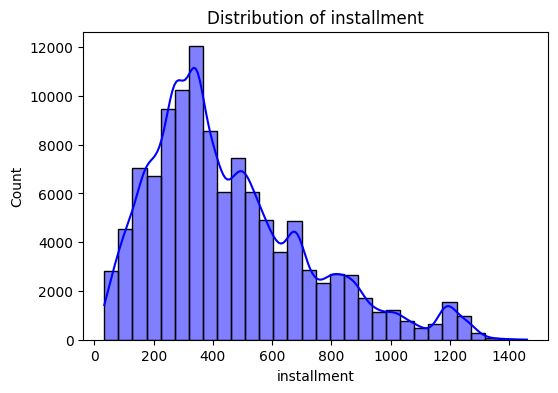

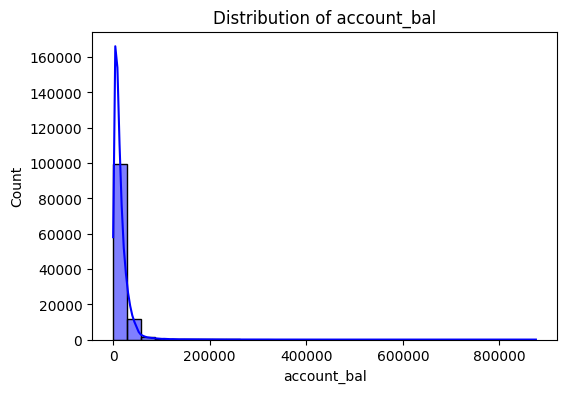

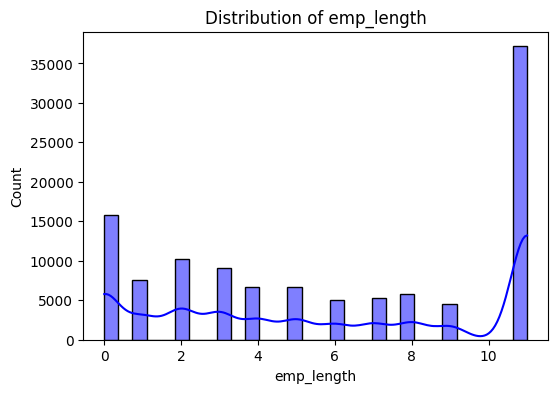

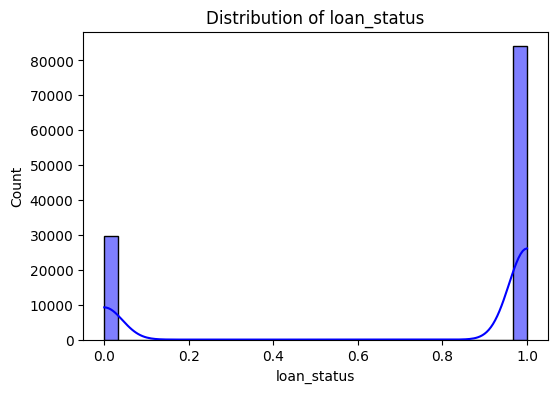

In [6]:
# Numerical Feature Analysis
numerical_features = train_data.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_data[feature].dropna(), kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()

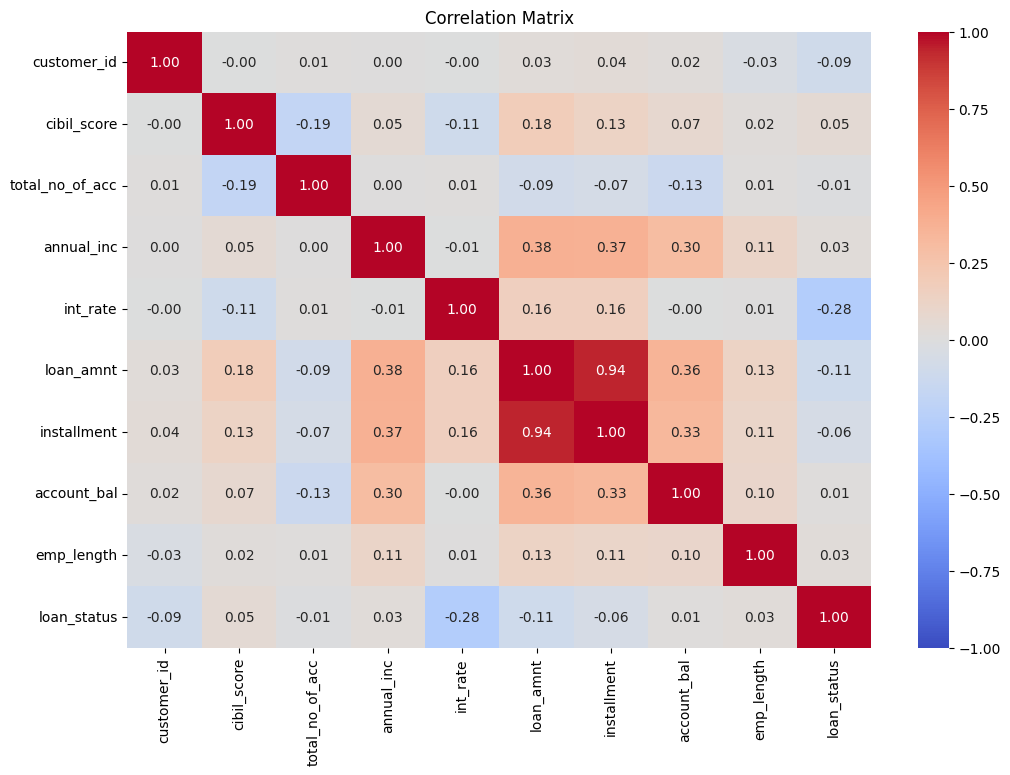

In [8]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-24-4941afa0c37e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)


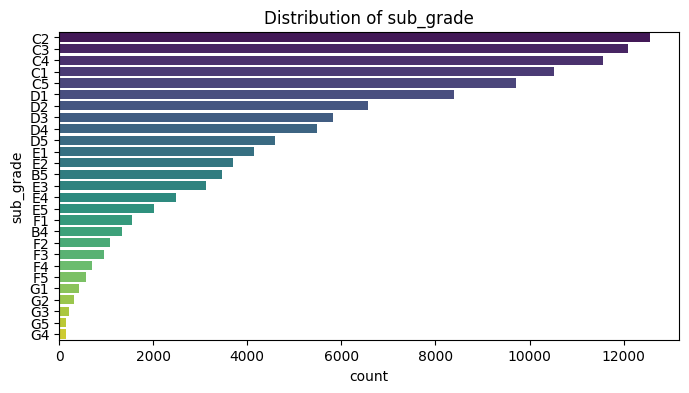

<ipython-input-24-4941afa0c37e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)


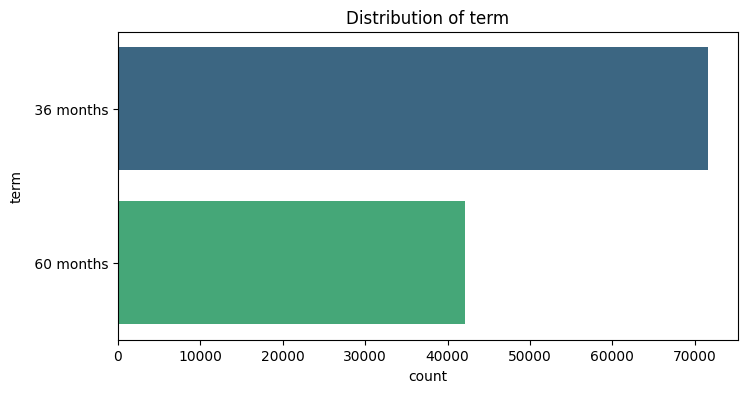

<ipython-input-24-4941afa0c37e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)


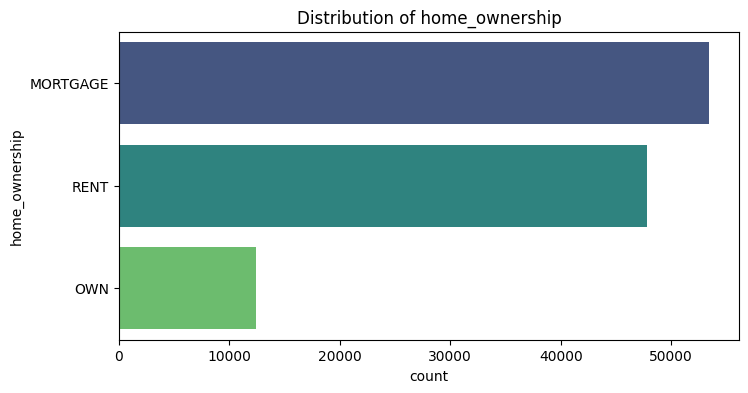

<ipython-input-24-4941afa0c37e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)


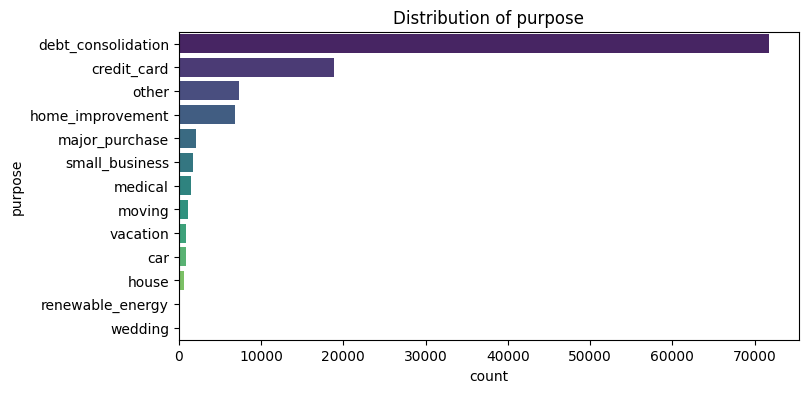

<ipython-input-24-4941afa0c37e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)


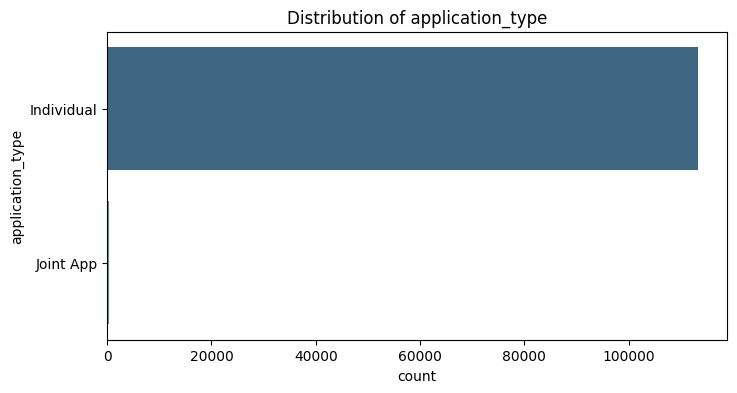

<ipython-input-24-4941afa0c37e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)


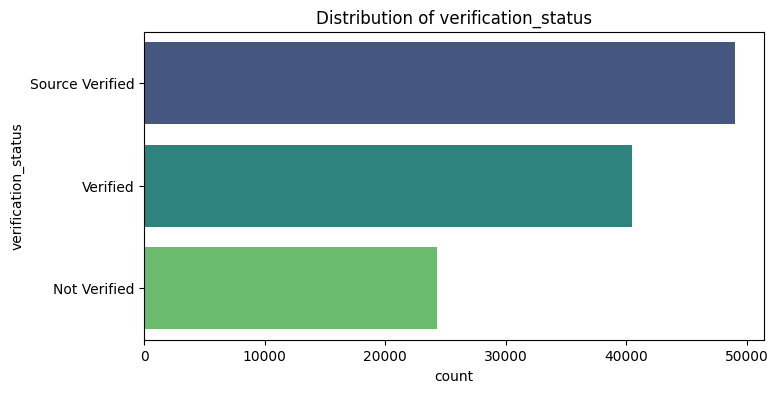

In [24]:
# Categorical Feature Analysis
categorical_features = train_data.select_dtypes(include=[object]).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()

<ipython-input-9-8ea9d6c850b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='cibil_score', data=train_data, palette='viridis')


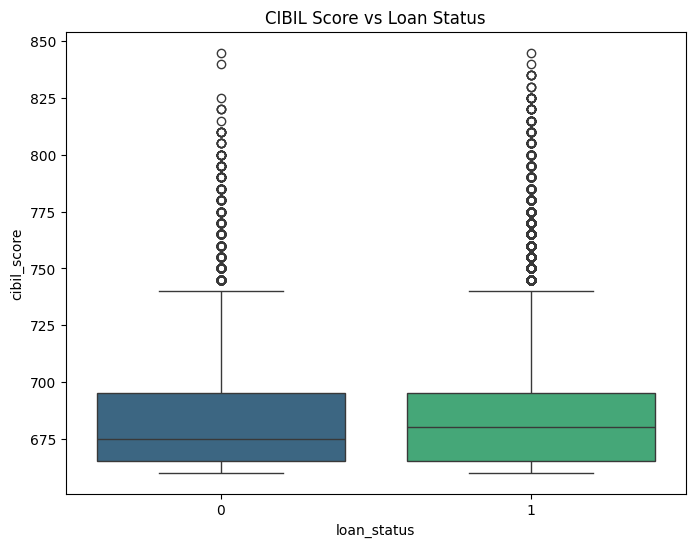

In [9]:
# CIBIL Score vs Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=train_data, palette='viridis')
plt.title('CIBIL Score vs Loan Status')
plt.show()

<ipython-input-10-7cfc8dec3305>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_amnt', data=train_data, palette='viridis')


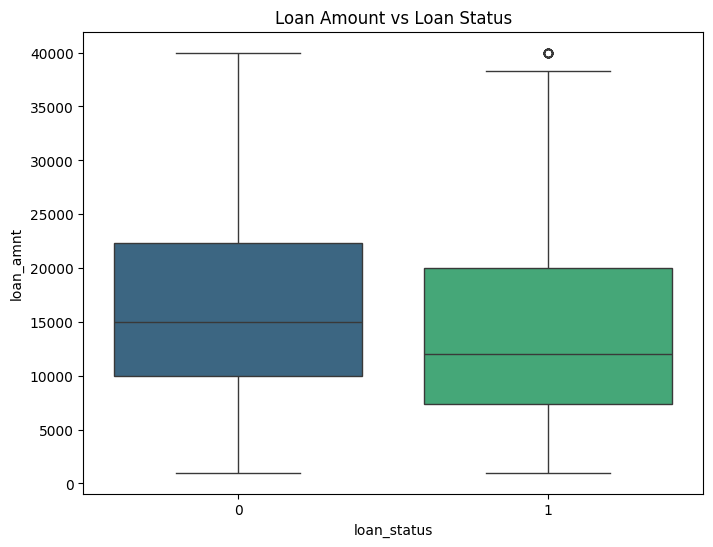

In [10]:
# Loan Amount vs Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=train_data, palette='viridis')
plt.title('Loan Amount vs Loan Status')
plt.show()

<ipython-input-11-ad0562050357>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='emp_length', data=train_data, palette='viridis')


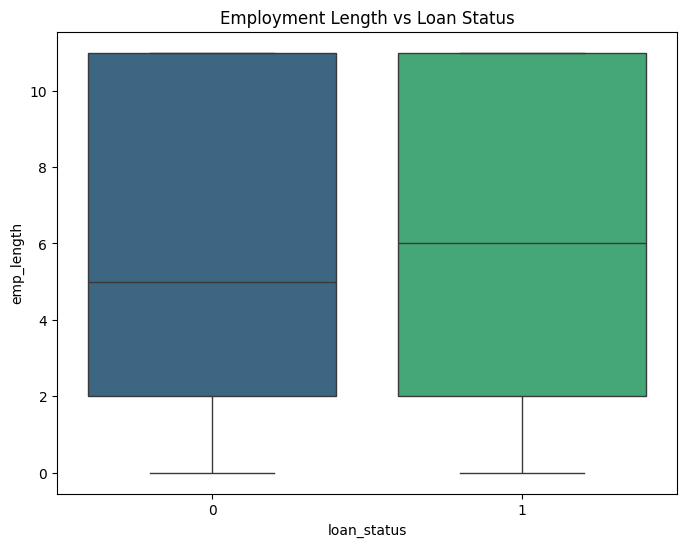

In [11]:
# Employment Length vs Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='emp_length', data=train_data, palette='viridis')
plt.title('Employment Length vs Loan Status')
plt.show()

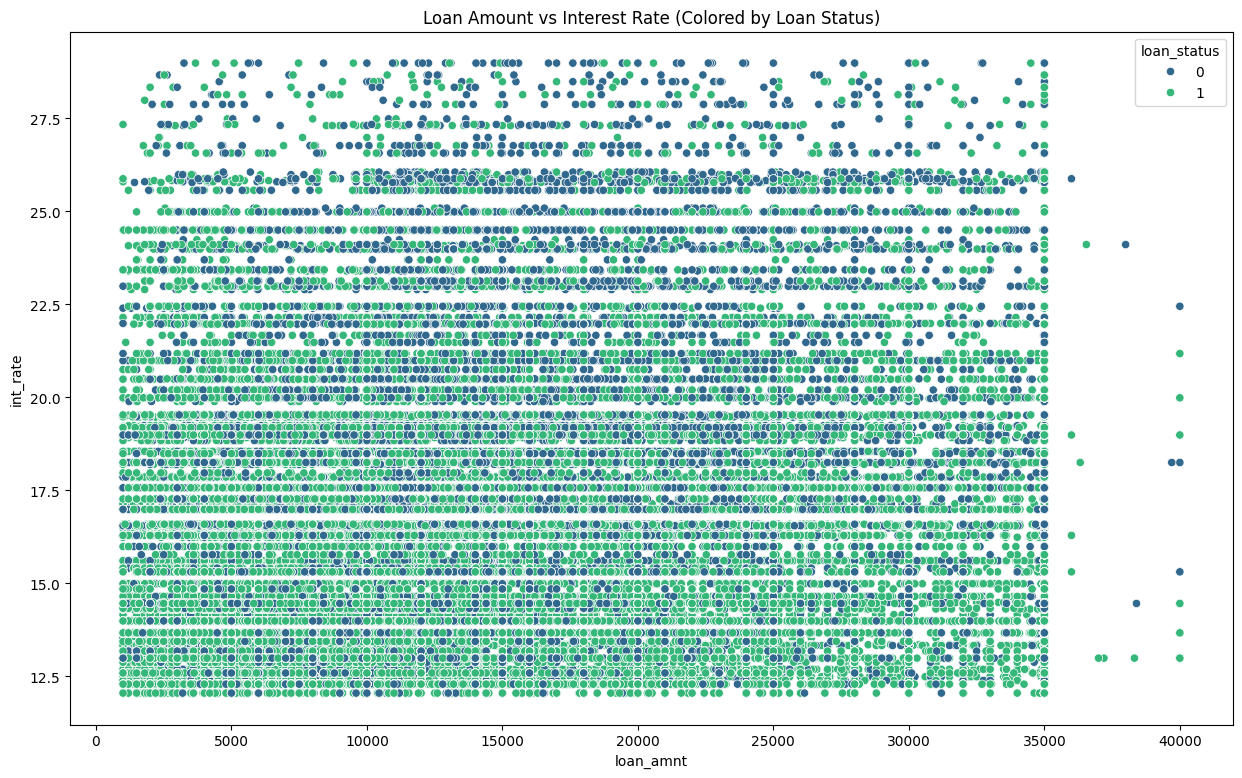

In [14]:
# Relationship between Loan Amount and Interest Rate
plt.figure(figsize=(15, 9))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_status', data=train_data, palette='viridis')
plt.title('Loan Amount vs Interest Rate (Colored by Loan Status)')
plt.show()

<ipython-input-15-a5b21ed78a81>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='income_to_loan_ratio', data=train_data, palette='viridis')


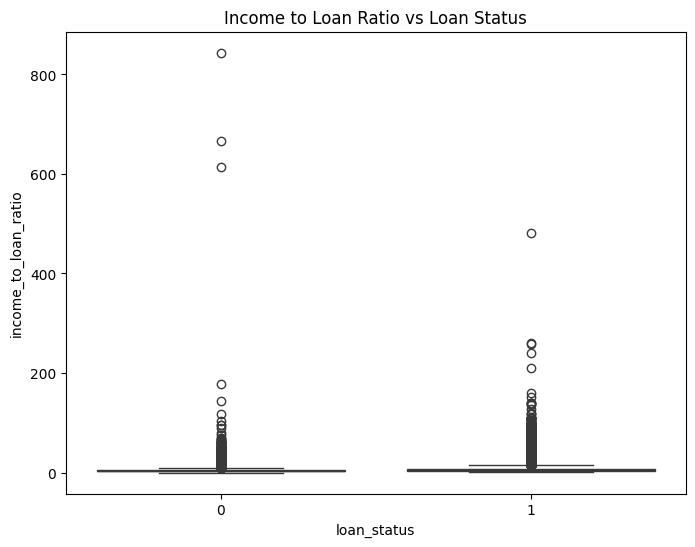

In [15]:
# Derived Feature: Income to Loan Ratio
train_data['income_to_loan_ratio'] = train_data['annual_inc'] / train_data['loan_amnt']
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='income_to_loan_ratio', data=train_data, palette='viridis')
plt.title('Income to Loan Ratio vs Loan Status')
plt.show()

<ipython-input-16-bbf6818c7250>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data[feature], palette='viridis')


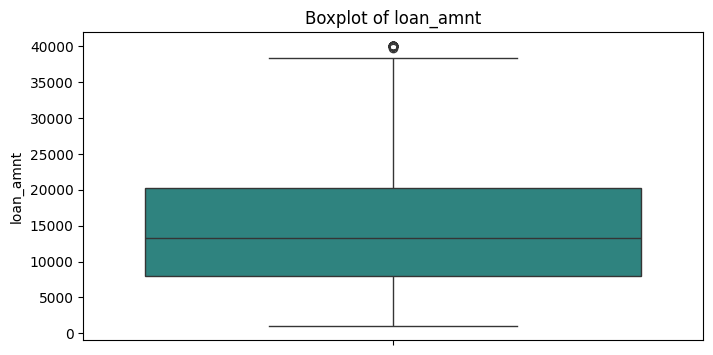

<ipython-input-16-bbf6818c7250>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data[feature], palette='viridis')


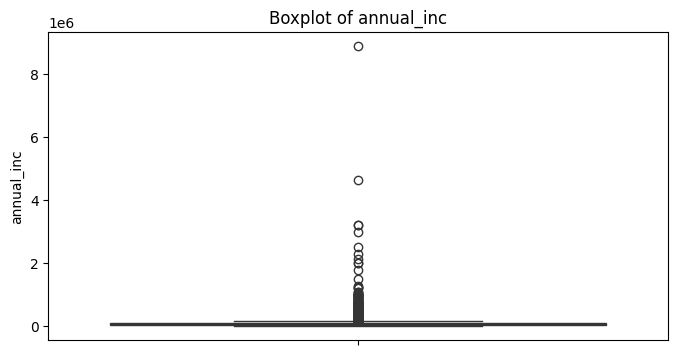

<ipython-input-16-bbf6818c7250>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data[feature], palette='viridis')


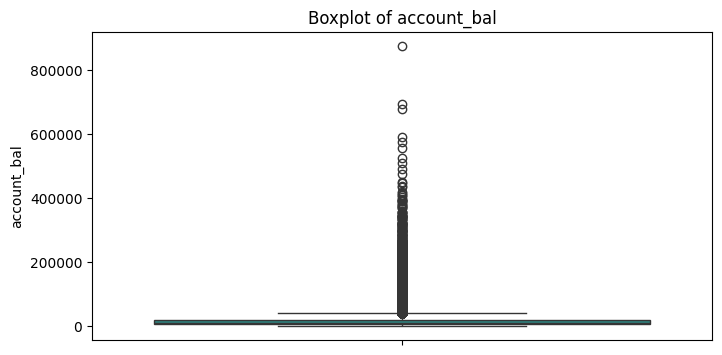

In [16]:
# Outlier Detection using Boxplots
for feature in ['loan_amnt', 'annual_inc', 'account_bal']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_data[feature], palette='viridis')
    plt.title(f'Boxplot of {feature}')
    plt.show()

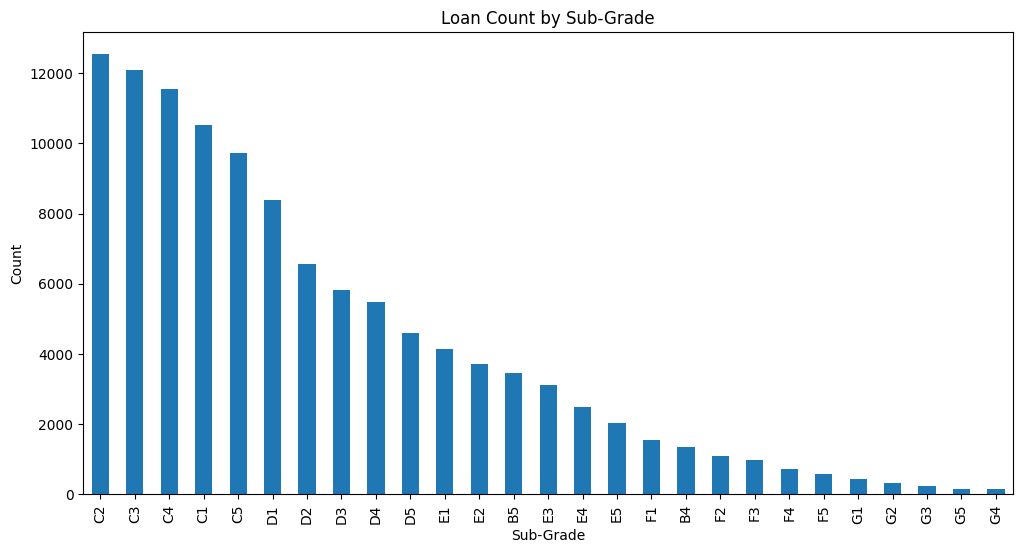

In [22]:
# Count of loans by sub_grade
sub_grade_counts = train_data['sub_grade'].value_counts()
plt.figure(figsize=(12, 6))
sub_grade_counts.plot(kind='bar')
plt.title('Loan Count by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.show()

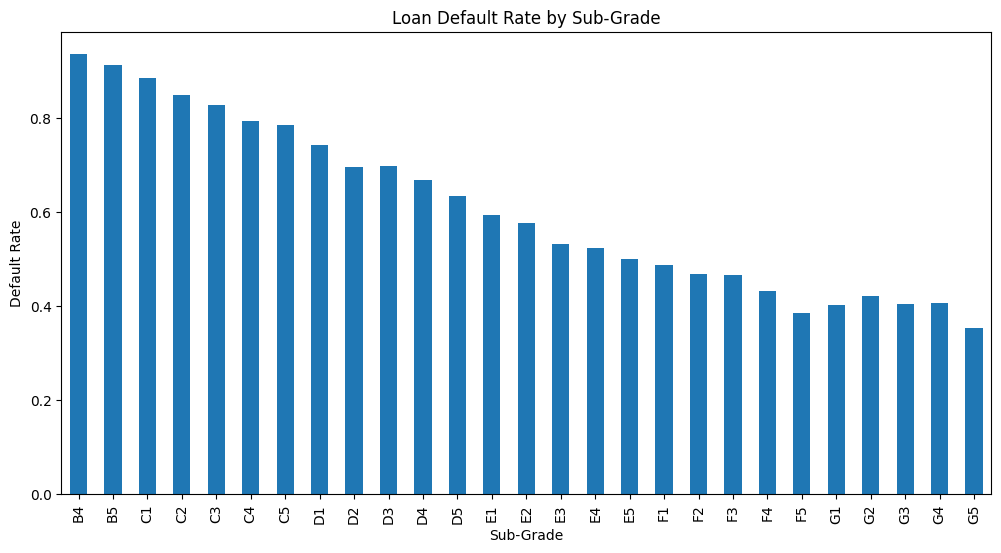

In [23]:
# Default rate by sub_grade
sub_grade_defaults = train_data.groupby('sub_grade')['loan_status'].mean()
plt.figure(figsize=(12, 6))
sub_grade_defaults.plot(kind='bar')
plt.title('Loan Default Rate by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Default Rate')
plt.show()

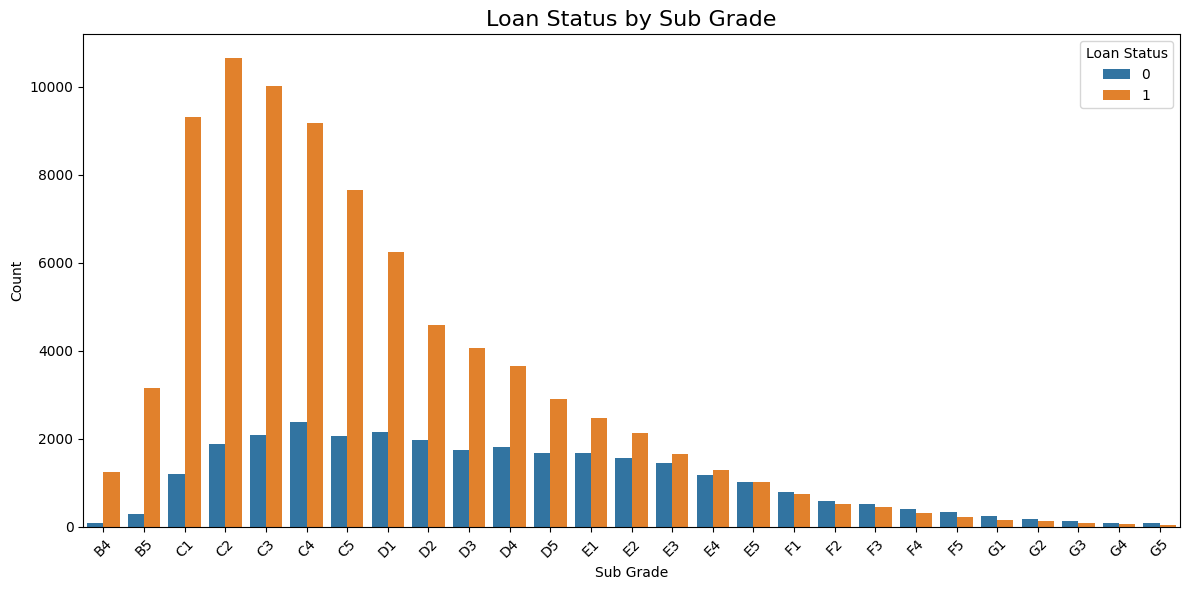

In [26]:
# 1. Sub Grade vs Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x="sub_grade", hue="loan_status", order=sorted(train_data["sub_grade"].unique()))
plt.title("Loan Status by Sub Grade", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Sub Grade")
plt.ylabel("Count")
plt.legend(title="Loan Status", loc="upper right")
plt.tight_layout()
plt.show()

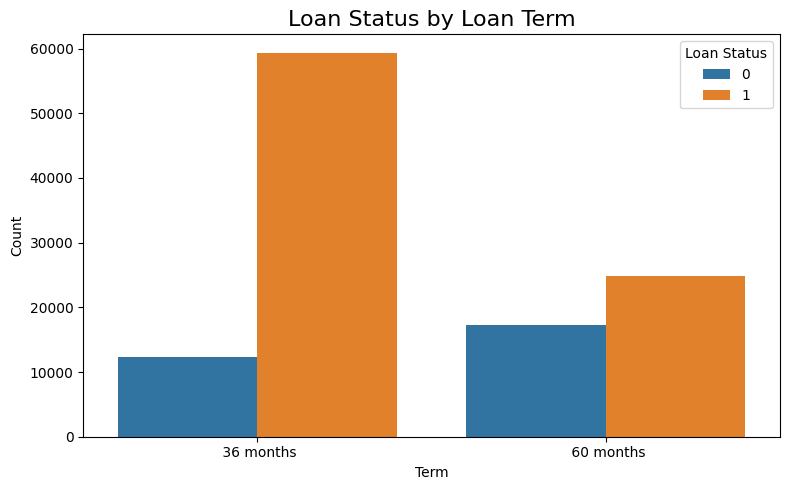

In [28]:
# 2. Term vs Loan Status
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x="term", hue="loan_status")
plt.title("Loan Status by Loan Term", fontsize=16)
plt.xlabel("Term")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()

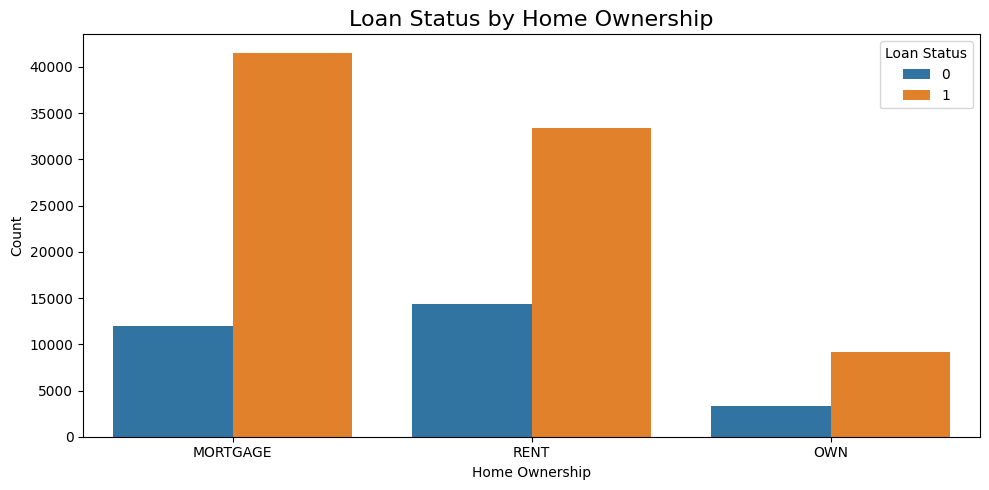

In [30]:
# 3. Home Ownership vs Loan Status
plt.figure(figsize=(10, 5))
sns.countplot(data=train_data, x="home_ownership", hue="loan_status", order=train_data["home_ownership"].value_counts().index)
plt.title("Loan Status by Home Ownership", fontsize=16)
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()

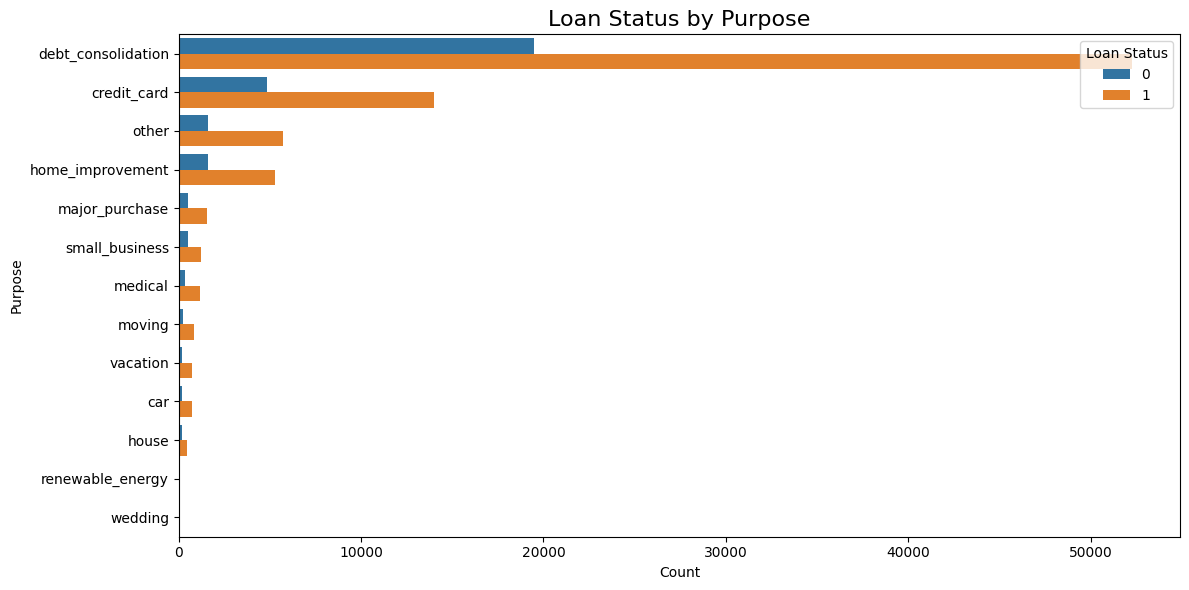

In [31]:
# 4. Purpose vs Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, y="purpose", hue="loan_status", order=train_data["purpose"].value_counts().index)
plt.title("Loan Status by Purpose", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Purpose")
plt.legend(title="Loan Status", loc="upper right")
plt.tight_layout()
plt.show()

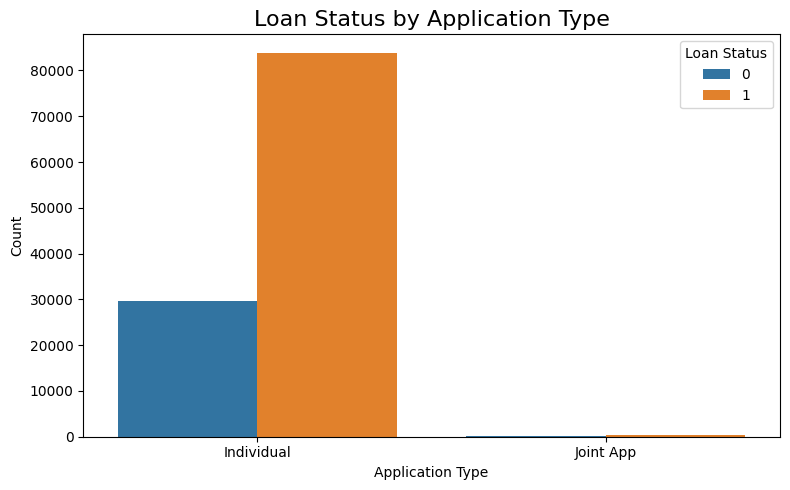

In [32]:
# 5. Application Type vs Loan Status
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x="application_type", hue="loan_status")
plt.title("Loan Status by Application Type", fontsize=16)
plt.xlabel("Application Type")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()

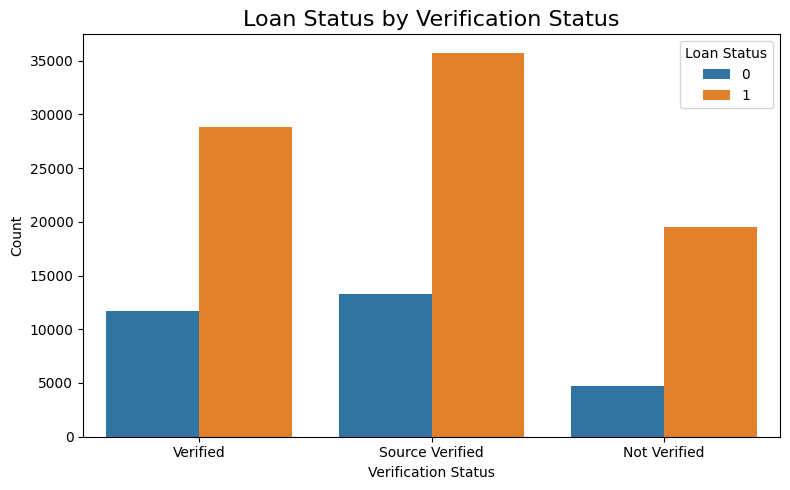

In [34]:
# 6. Verification Status vs Loan Status
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x="verification_status", hue="loan_status")
plt.title("Loan Status by Verification Status", fontsize=16)
plt.xlabel("Verification Status")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()

<ipython-input-35-fa05de7ceaee>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_defaults.index, y=yearly_defaults.values, palette='coolwarm')


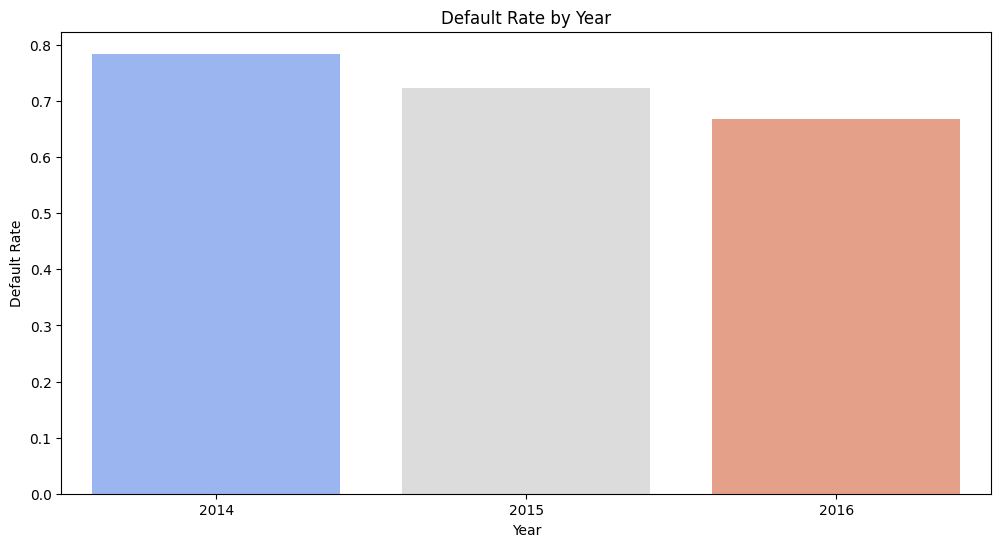

<ipython-input-35-fa05de7ceaee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_defaults.index, y=monthly_defaults.values, palette='viridis')


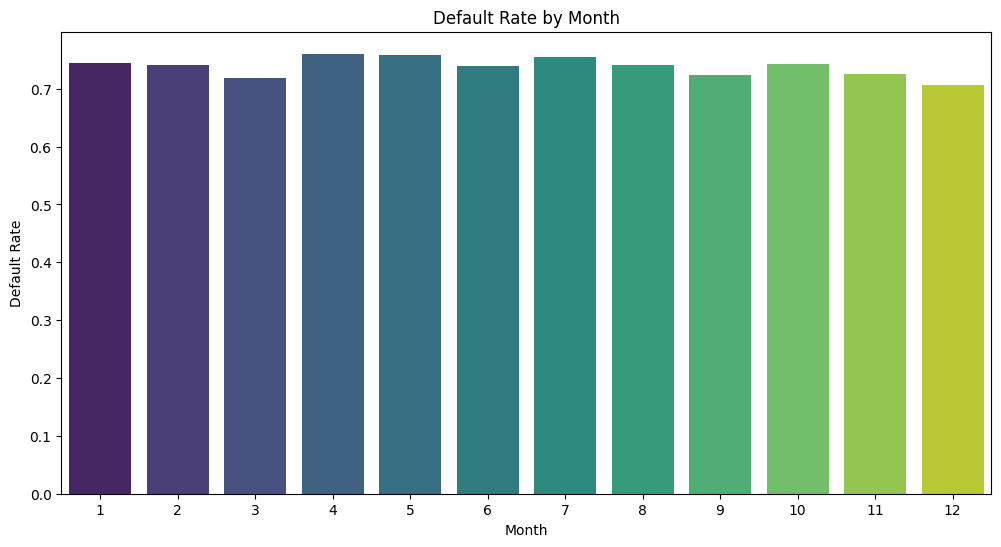

In [35]:
# Convert 'transaction_date' to datetime if not already
train_data['transaction_date'] = pd.to_datetime(train_data['transaction_date'])

# Extract year and month from the transaction_date
train_data['year'] = train_data['transaction_date'].dt.year
train_data['month'] = train_data['transaction_date'].dt.month

# Plot default rate by year
plt.figure(figsize=(12, 6))
yearly_defaults = train_data.groupby('year')['loan_status'].mean()
sns.barplot(x=yearly_defaults.index, y=yearly_defaults.values, palette='coolwarm')
plt.title('Default Rate by Year')
plt.xlabel('Year')
plt.ylabel('Default Rate')
plt.show()

# Plot default rate by month
plt.figure(figsize=(12, 6))
monthly_defaults = train_data.groupby('month')['loan_status'].mean()
sns.barplot(x=monthly_defaults.index, y=monthly_defaults.values, palette='viridis')
plt.title('Default Rate by Month')
plt.xlabel('Month')
plt.ylabel('Default Rate')
plt.show()